In [1]:
import collections
import math
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import community
from itertools import count

# Analysis of the attributes

In [2]:
actors_agg_adj = np.load("sparse_agg_actor_adj.npy")
actors_agg_df = pd.read_pickle("actors_agg_df.pkl")
actors_graph = nx.from_numpy_matrix(actors_agg_adj)

In [3]:
# Add name and gender as node attribute
name_dict = {}
gender_dict = {}
attributes = actors_agg_df[['actors', 'gender']].values
for index, attr in enumerate(attributes):
     name_dict[index] = attr[0]    
     gender_dict[index] = attr[1]

nx.set_node_attributes(actors_graph, name_dict, 'name')
nx.set_node_attributes(actors_graph, gender_dict, 'gender')

In [4]:
# Add eigenvector centrality as node attribute
eigenvector_dict = nx.eigenvector_centrality(actors_graph)
nx.set_node_attributes(actors_graph, eigenvector_dict, 'eigenvector')

In [5]:
# Create communities using community detection library
communities_dict = community.best_partition(actors_graph)
# Add community as attribute
nx.set_node_attributes(actors_graph, communities_dict, 'community')

In [6]:
# Extract communities to an array of objects
communities = []
for i in range(max(communities_dict.values()) + 1):
    communities.append([actors_graph.node[n] for n in actors_graph.nodes() if actors_graph.node[n]['community'] == i])

In [7]:
# Create dataframe from extracted communities 
communities_df = [pd.DataFrame(n) for n in communities]

In [8]:
# Find representatives of each class by eigenvector centrality
for index, community in enumerate(communities_df):
    print(f'Representatives of community {index} with a size of {len(community.index)} actors\n{community.nlargest(10, "eigenvector")}\n')

Representatives of community 0 with a size of 484 actors
                name  gender  eigenvector  community
359    Orlando Jones       2     0.044607          0
180         Huang Bo       0     0.043293          0
445      Sun Honglei       2     0.043173          0
440   Stephen McCole       2     0.043160          0
157  Garry Shandling       2     0.042211          0
100   D. David Morin       2     0.042163          0
311     Matt LeBlanc       2     0.041989          0
77     Carl Weathers       0     0.041986          0
237     Josh Duhamel       2     0.041903          0
62    Billy Connolly       0     0.041799          0

Representatives of community 1 with a size of 399 actors
                            name  gender  eigenvector  community
74                   Colin Hanks       2     0.039092          1
353                  Steve Howey       2     0.038279          1
271                Natalie Press       0     0.037941          1
371                Tom Burlinson       2  

We can observe that in community 2 we have notable A-list actors while in the smallest one (community 4) we have celebrities who might have participated in some movies but are not really actors.

# Visualization

C:\ProgramData\Anaconda3\envs\ntds_2019\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


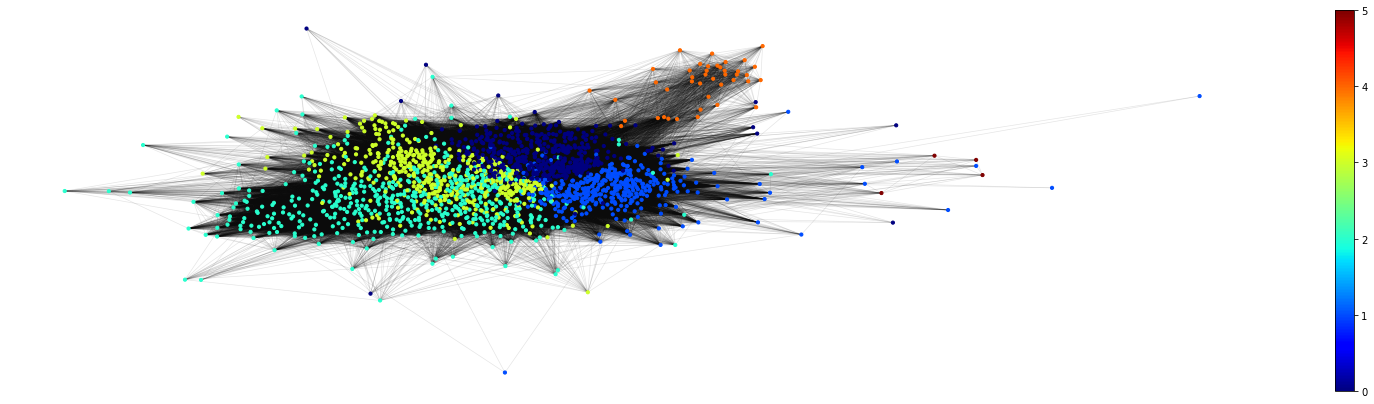

In [9]:
# Visualize with colors per community
groups = set(nx.get_node_attributes(actors_graph,'community').values())
mapping = dict(zip(sorted(groups),count()))
nodes = actors_graph.nodes()
colors = [mapping[actors_graph.node[n]['community']] for n in nodes]

# Drawing nodes and edges separately to add colors
plt.figure(figsize=(28, 7))
pos = nx.spring_layout(actors_graph)
ec = nx.draw_networkx_edges(actors_graph, pos, alpha=0.1, width=0.7)
nc = nx.draw_networkx_nodes(actors_graph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=False, node_size=10, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.show()

We can observe that community 2 (the famous A-list actors) tend to work together more often, and also with a selection of actors from other communities. Some mid-tier actors are popular and mix with many other communities, while some are stuck in their own community. The celebrities who are not really actors (community 4) are very separated from other actors communities.